# Imports

In [9]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras import backend as K
from keras import regularizers
from keras import losses

In [1]:
# size of encoded representation
dim_input = dim_output = 784  # 28 * 28
dim_encoding = 32

# input
_input = Input(shape=(dim_input,), name="input")
# encoded input
encoded = Dense(dim_encoding, activation="relu", name="encoder")(_input)
# decoded output: lossy reconstruction
decoded = Dense(dim_output, activation="sigmoid", name="decoder")(encoded)

# maps input to lossy reconstruction; full autoencoder
autoencoder = Model(_input, decoded)

# standalone encoder
encoder = Model(_input, encoded)

# standalone decoder
e_input = Input(shape=(dim_encoding,), name="encoded_input")
decoder_layer = autoencoder.layers[-1](e_input)

decoder = Model(e_input, decoder_layer)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

Using TensorFlow backend.


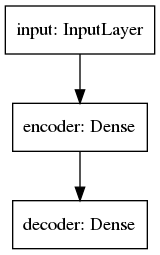

In [10]:
from keras.utils import plot_model

plot_model(autoencoder, to_file="model.png")

In [27]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2755 - val_loss: 0.1883
Epoch 2/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.1701 - val_loss: 0.1529
Epoch 3/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1438 - val_loss: 0.1331
Epoch 4/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.1280 - val_loss: 0.1209
Epoch 5/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1179 - val_loss: 0.1126
Epoch 6/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1110 - val_loss: 0.1070
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1060 - val_loss: 0.1028
Epoch 8/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.1024 - val_loss: 0.0997
Epoch 9/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.0997 - val_loss: 0.0974
Epo

In [15]:
imgs_encoded = encoder.predict(x_test)
imgs_decoded = decoder.predict(imgs_encoded)

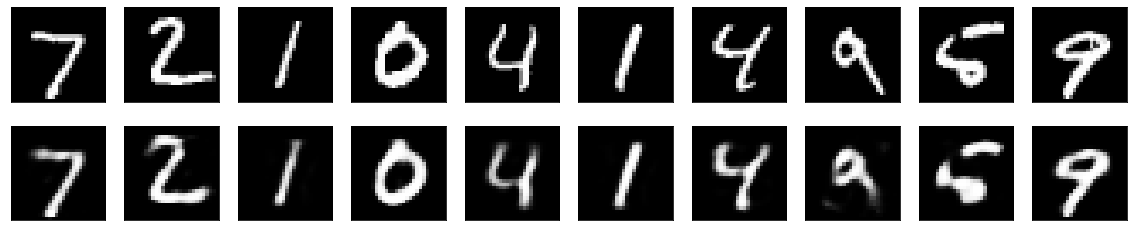

In [19]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imgs_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
from keras import regularizers

# size of encoded representation
dim_input = dim_output = 784  # 28 * 28
dim_encoding = 32

# input
_input = Input(shape=(dim_input,), name="input")
# encoded input
encoded = Dense(
    dim_encoding,
    activation="relu",
    activity_regularizer=regularizers.l1(10e-5),
    name="encoder",
)(_input)
# decoded output: lossy reconstruction
decoded = Dense(dim_output, activation="sigmoid", name="decoder")(encoded)

# maps input to lossy reconstruction; full autoencoder
autoencoder = Model(_input, decoded)

# standalone encoder
encoder = Model(_input, encoded)

# standalone decoder
e_input = Input(shape=(dim_encoding,), name="encoded_input")
decoder_layer = autoencoder.layers[-1](e_input)

decoder = Model(e_input, decoder_layer)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [21]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 126us/step - loss: 0.6556 - val_loss: 0.6155
Epoch 2/25
60000/60000 [==============================] - 7s 113us/step - loss: 0.5832 - val_loss: 0.5535
Epoch 3/25
60000/60000 [==============================] - 7s 111us/step - loss: 0.5274 - val_loss: 0.5037
Epoch 4/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.4827 - val_loss: 0.4637
Epoch 5/25
60000/60000 [==============================] - 7s 112us/step - loss: 0.4466 - val_loss: 0.4313
Epoch 6/25
60000/60000 [==============================] - 11s 176us/step - loss: 0.4173 - val_loss: 0.4050
Epoch 7/25
60000/60000 [==============================] - 10s 170us/step - loss: 0.3934 - val_loss: 0.3834
Epoch 8/25
60000/60000 [==============================] - 11s 180us/step - loss: 0.3738 - val_loss: 0.3656
Epoch 9/25
60000/60000 [==============================] - 10s 163us/step - loss: 0.3576 - val_loss:

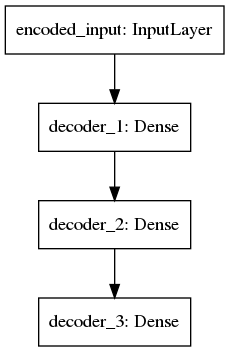

In [50]:
plot_model(decoder, to_file="model.png")

In [51]:
# input
_input = Input(shape=(dim_input,), name="input")
# encoded input
encoded = Dense(128, activation="relu", name="encoder_1")(_input)
encoded = Dense(64, activation="relu", name="encoder_2")(encoded)
encoded = Dense(dim_encoding, activation="relu", name="encoder_3")(encoded)

# decoded output: lossy reconstruction
decoded = Dense(64, activation="relu", name="decoder_1")(encoded)
decoded = Dense(128, activation="relu", name="decoder_2")(decoded)
decoded = Dense(dim_output, activation="sigmoid", name="decoder_3")(decoded)

# maps input to lossy reconstruction; full autoencoder
autoencoder = Model(_input, decoded)

# standalone encoder
encoder = Model(_input, encoded)

# standalone decoder
e_input = Input(shape=(dim_encoding,), name="encoded_input")
decoder_layer = autoencoder.layers[-3](e_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = Model(e_input, decoder_layer)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [52]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 10s 163us/step - loss: 0.2464 - val_loss: 0.1663
Epoch 2/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.1522 - val_loss: 0.1394
Epoch 3/25
60000/60000 [==============================] - 9s 148us/step - loss: 0.1334 - val_loss: 0.1252
Epoch 4/25
60000/60000 [==============================] - 9s 152us/step - loss: 0.1231 - val_loss: 0.1179
Epoch 5/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.1172 - val_loss: 0.1135
Epoch 6/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.1131 - val_loss: 0.1096
Epoch 7/25
60000/60000 [==============================] - 9s 153us/step - loss: 0.1096 - val_loss: 0.1066
Epoch 8/25
60000/60000 [==============================] - 10s 160us/step - loss: 0.1067 - val_loss: 0.1039
Epoch 9/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.1042 - val_loss: 0

In [53]:
imgs_encoded = encoder.predict(x_test)
imgs_decoded = decoder.predict(imgs_encoded)

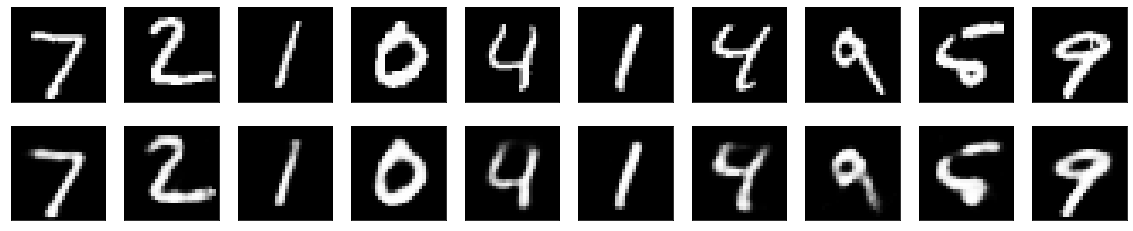

In [54]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imgs_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# VAE

In [168]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [157]:
batch_size = 256
epochs = 25
dim_input = 784
dim_intermediate = 128
dim_latent = 64
epsilon_std = 1.0

In [159]:
from keras import metrics

In [179]:
x = Input(shape=(dim_input,), name="encoder_input")
h = Dense(dim_intermediate, activation="relu")(x)
z_mean = Dense(dim_latent, name="z_mean")(h)
z_log_sigma = Dense(dim_latent, name="z_log_sigma")(h)


def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(
        shape=(batch_size, dim_latent),
        mean=0.0,
    )
    return z_mean + K.exp(z_log_sigma) * epsilon


# def sampling(args):
#     z_mean, z_log_sigma = args
#     batch = K.shape(z_mean)[0]
#     dim = K.int_shape(z_mean)[1]
#     epsilon = K.random_normal(shape = (batch, dim))
#     return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling, name="z")([z_mean, z_log_sigma])
decoder_h = Dense(dim_intermediate, activation="relu")
decoder_mean = Dense(units=dim_input, activation="sigmoid")
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# autoencoder
vae = Model(x, x_decoded_mean)
# encoder
# encoder = Model(x, [z_mean, z_log_sigma, z], name='encoder')
encoder = Model(x, z_mean, name="encoder")

# generator
decoder_input = Input(shape=(dim_latent,), name="z_sampling")
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean, name="decoder")


def vae_loss(x, x_decoded_mean):
    xent_loss = dim_input * metrics.mse(x, x_decoded_mean)
    kl_loss = -0.5 * K.sum(
        1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1
    )
    return K.mean(kl_loss + K.mean(xent_loss))


# def vae_loss(x, x_decoded_mean):
#     xent_loss = metrics.binary_crossentropy(x, x_decoded_mean)
#     kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
#     return xent_loss + kl_loss

vae.compile(optimizer="adam", loss=vae_loss)

In [180]:
vae.fit(
    x_train,
    x_train,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, x_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59904/60000 [============================>.] - ETA: 0s - loss: 52.5242

InvalidArgumentError:  Incompatible shapes: [96,64] vs. [128,64]
	 [[node z_37/mul (defined at /home/starscream/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_676184]

Function call stack:
keras_scratch_graph


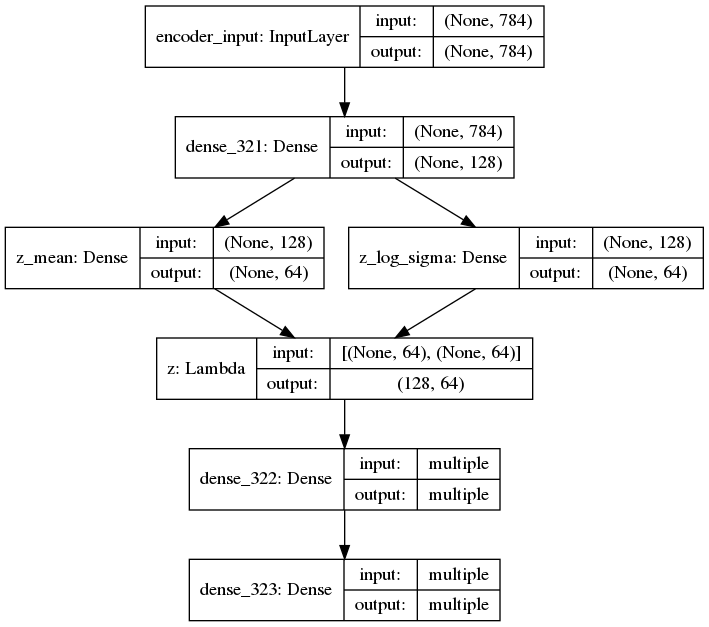

In [181]:
from keras.utils import plot_model

plot_model(vae, to_file="model.png", show_shapes=True)

# Convnet VAE

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 8)    80          encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 16)     1168        batch_normalization_1[0][0]      
____________________________________________________________________________________________

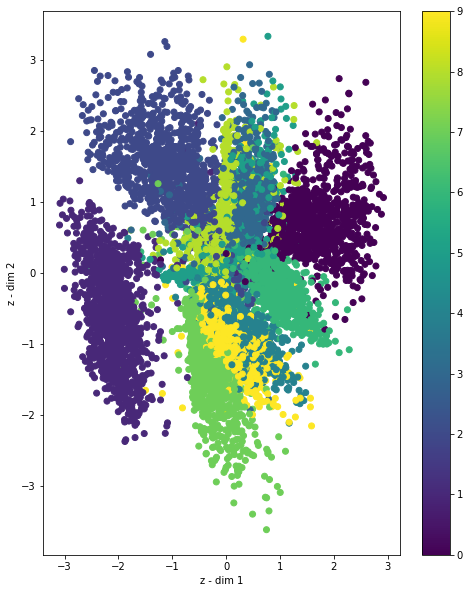

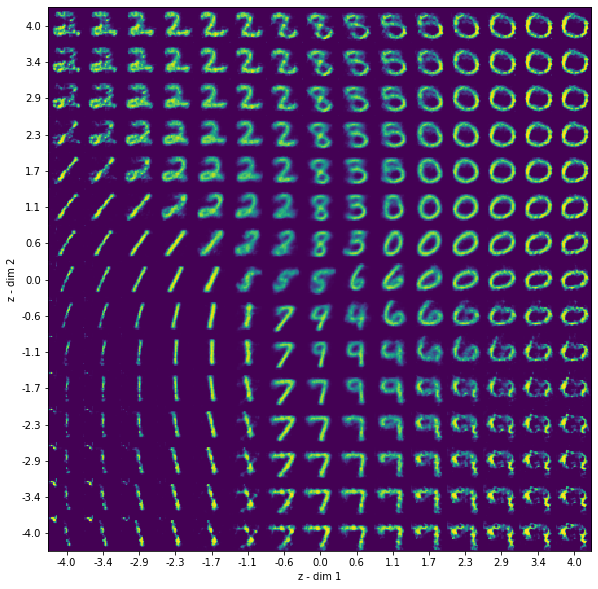

In [141]:
"""
  Variational Autoencoder (VAE) with the Keras Functional API.
"""

import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Data & model configuration
img_width, img_height = input_train.shape[1], input_train.shape[2]
batch_size = 128
no_epochs = 100
validation_split = 0.2
verbosity = 1
latent_dim = 2
num_channels = 1

# Reshape data
input_train = input_train.reshape(
    input_train.shape[0], img_height, img_width, num_channels
)
input_test = input_test.reshape(
    input_test.shape[0], img_height, img_width, num_channels
)
input_shape = (img_height, img_width, num_channels)

# Parse numbers as floats
input_train = input_train.astype("float32")
input_test = input_test.astype("float32")

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# # =================
# # Encoder
# # =================

# Definition
i = Input(shape=input_shape, name="encoder_input")
cx = Conv2D(filters=8, kernel_size=3, strides=2, padding="same", activation="relu")(i)
cx = BatchNormalization()(cx)
cx = Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation="relu")(cx)
cx = BatchNormalization()(cx)
x = Flatten()(cx)
x = Dense(20, activation="relu")(x)
x = BatchNormalization()(x)
mu = Dense(latent_dim, name="latent_mu")(x)
sigma = Dense(latent_dim, name="latent_sigma")(x)

# Get Conv2D shape for Conv2DTranspose operation in decoder
conv_shape = K.int_shape(cx)

# Define sampling with reparameterization trick
def sample_z(args):
    mu, sigma = args
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch, dim))
    return mu + K.exp(sigma / 2) * eps


# Use reparameterization trick to ....??
z = Lambda(sample_z, output_shape=(latent_dim,), name="z")([mu, sigma])

# Instantiate encoder
encoder = Model(i, [mu, sigma, z], name="encoder")
encoder.summary()

# =================
# Decoder
# =================

# Definition
d_i = Input(shape=(latent_dim,), name="decoder_input")
x = Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation="relu")(d_i)
x = BatchNormalization()(x)
x = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
cx = Conv2DTranspose(
    filters=16, kernel_size=3, strides=2, padding="same", activation="relu"
)(x)
cx = BatchNormalization()(cx)
cx = Conv2DTranspose(
    filters=8, kernel_size=3, strides=2, padding="same", activation="relu"
)(cx)
cx = BatchNormalization()(cx)
o = Conv2DTranspose(
    filters=num_channels,
    kernel_size=3,
    activation="sigmoid",
    padding="same",
    name="decoder_output",
)(cx)

# Instantiate decoder
decoder = Model(d_i, o, name="decoder")
decoder.summary()

# =================
# VAE as a whole
# =================

# Instantiate VAE
vae_outputs = decoder(encoder(i)[2])
vae = Model(i, vae_outputs, name="vae")
vae.summary()

# Define loss
def kl_reconstruction_loss(true, pred):
    # Reconstruction loss
    reconstruction_loss = (
        binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height
    )
    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)


# Compile VAE
vae.compile(optimizer="adam", loss=kl_reconstruction_loss)

# Train autoencoder
vae.fit(
    input_train,
    input_train,
    epochs=no_epochs,
    batch_size=batch_size,
    validation_split=validation_split,
)

# =================
# Results visualization
# Credits for original visualization code: https://keras.io/examples/variational_autoencoder_deconv/
# (François Chollet).
# Adapted to accomodate this VAE.
# =================
def viz_latent_space(encoder, data):
    input_data, target_data = data
    mu, _, _ = encoder.predict(input_data)
    plt.figure(figsize=(8, 10))
    plt.scatter(mu[:, 0], mu[:, 1], c=target_data)
    plt.xlabel("z - dim 1")
    plt.ylabel("z - dim 2")
    plt.colorbar()
    plt.show()


def viz_decoded(encoder, decoder, data):
    num_samples = 15
    figure = np.zeros((img_width * num_samples, img_height * num_samples, num_channels))
    grid_x = np.linspace(-4, 4, num_samples)
    grid_y = np.linspace(-4, 4, num_samples)[::-1]
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(img_width, img_height, num_channels)
            figure[
                i * img_width : (i + 1) * img_width,
                j * img_height : (j + 1) * img_height,
            ] = digit
    plt.figure(figsize=(10, 10))
    start_range = img_width // 2
    end_range = num_samples * img_width + start_range + 1
    pixel_range = np.arange(start_range, end_range, img_width)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z - dim 1")
    plt.ylabel("z - dim 2")
    # matplotlib.pyplot.imshow() needs a 2D array, or a 3D array with the third dimension being of shape 3 or 4!
    # So reshape if necessary
    fig_shape = np.shape(figure)
    if fig_shape[2] == 1:
        figure = figure.reshape((fig_shape[0], fig_shape[1]))
    # Show image
    plt.imshow(figure)
    plt.show()


# Plot results
data = (input_test, target_test)
viz_latent_space(encoder, data)
viz_decoded(encoder, decoder, data)

# Keras Sample VAE

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon


def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector

    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.savefig(filename)
    plt.show()


# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# network parameters
input_shape = (original_dim,)
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name="encoder_input")
x = Dense(intermediate_dim, activation="relu")(inputs)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()
plot_model(encoder, to_file="vae_mlp_encoder.png", show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name="z_sampling")
x = Dense(intermediate_dim, activation="relu")(latent_inputs)
outputs = Dense(original_dim, activation="sigmoid")(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name="decoder")
decoder.summary()
plot_model(decoder, to_file="vae_mlp_decoder.png", show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name="vae_mlp")

models = (encoder, decoder)
data = (x_test, y_test)

reconstruction_loss = binary_crossentropy(inputs, outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer="adam")
vae.summary()
plot_model(vae, to_file="vae_mlp.png", show_shapes=True)

vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))
vae.save_weights("vae_mlp_mnist.h5")

plot_results(models, data, batch_size=batch_size, model_name="vae_mlp")

Using TensorFlow backend.


NameError: name 'sampling' is not defined

# LSTM

In [187]:
print(len(x_train), "train sequences")
x_train[0]

25000 train sequences


array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [192]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, MaxPooling1D
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

# print('Loading data...')
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# print(len(x_train), 'train sequences')
# print(len(x_test), 'test sequences')

# print('Pad sequences (samples x time)')
# x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
# x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)

print("Build model...")
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

# try using different optimizers and different optimizer configs
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Train...")
model.fit(
    x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test)
)
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test score:", score)
print("Test accuracy:", acc)

Build model...
Train...


/home/starscream/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 112s 4ms/step - loss: 0.4553 - accuracy: 0.7862 - val_loss: 0.4060 - val_accuracy: 0.8236
Epoch 2/5
25000/25000 [==============================] - 111s 4ms/step - loss: 0.3025 - accuracy: 0.8770 - val_loss: 0.3794 - val_accuracy: 0.8360
Epoch 3/5
25000/25000 [==============================] - 109s 4ms/step - loss: 0.2167 - accuracy: 0.9156 - val_loss: 0.4753 - val_accuracy: 0.8232
Epoch 4/5
25000/25000 [==============================] - 107s 4ms/step - loss: 0.1553 - accuracy: 0.9428 - val_loss: 0.4685 - val_accuracy: 0.8180
Epoch 5/5
25000/25000 [==============================] - 19s 762us/step
Test score: 0.5361863203716278
Test accuracy: 0.819320023059845
